<a href="https://colab.research.google.com/github/jongoh-Jeong/MachineLearning-for-AI/blob/main/1011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from pandas.plotting import scatter_matrix
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

drive.mount('/content/drive')

Mounted at /content/drive


# 1. Matplot을 이용한 시각화

In [ ]:
cd /content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05

/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05


In [ ]:
fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col = 'date', parse_dates = True)

### Plot components  
1) Figure : Top-levle object that holds the other plot components  
2) Axes : Individual plots contained within the Figure

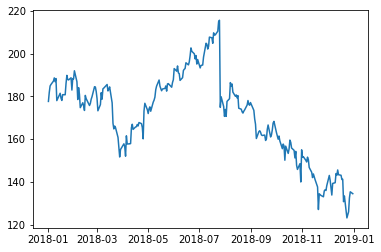

In [ ]:
plt.plot(fb.index, fb.open)
plt.show()

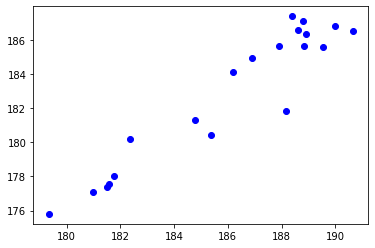

In [ ]:
plt.plot('high','low','ob',data = fb.head(20))   #3번째 인자를 통해 plot의 스타일 결정- o:점/b: 파란색

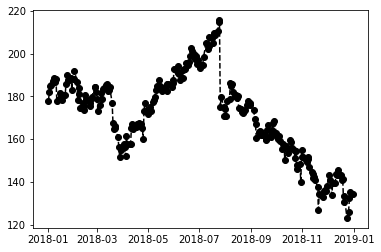

In [ ]:
plt.plot(fb.index,fb.open,'o--k')  #o:마커 - 원 /  -- : 점선 / k : 검은색

- plt.plot의 style  
Marker | Linestyle | color  순으로 작성  

1) Marker
. : point   
o : circles 
x : x |  

2) Linestyle  
\- : solid line  
\-- : dashed line  
\: : dotted line    

3) Color  
b : blue / k: black / r : red / g : green / m : magenta

### 히스토그램

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <a list of 10 Patch objects>)

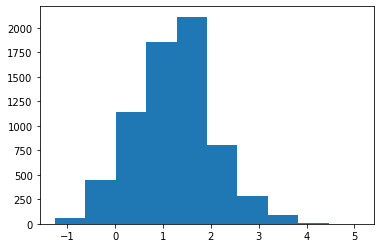

In [ ]:
quakes = pd.read_csv('data/earthquakes.csv')
plt.hist(quakes.query('magType == "ml"').mag)

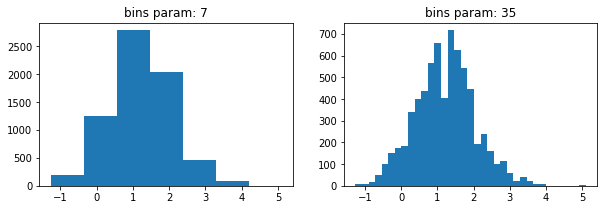

In [ ]:
x = quakes.query('magType=="ml"').mag

fig, axes = plt.subplots(1,2,figsize = (10,3))  # subplots( 행 수, 열 수, figsize = (가로길이, 세로길이))
for ax, bins in zip(axes, [7,35]): #구간의 개수 설정
  ax.hist(x, bins= bins)
  ax.set_title(f'bins param: {bins}')

- plot의 크기를 다르게 설정할 경우, add_gridspec()method를 사용할 수 있다.

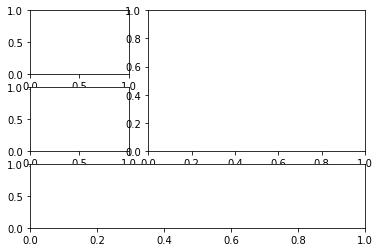

In [ ]:
fig = plt.figure()

gs = fig.add_gridspec(3,3)
top_left = fig.add_subplot(gs[0,0])
mid_left = fig.add_subplot(gs[1,0])
top_right = fig.add_subplot(gs[:2,1:])
bottom = fig.add_subplot(gs[2,:])

In [ ]:
'''
fig.savefig('empty.png')  #savefig()를 통해 그래프 저장 가능
'''
plt.close('all') # It is good practice to close them when we are done with them so that we don't waste any resource

- Additional Option  
\- Control the size using figsize option

<Figure size 720x288 with 0 Axes>

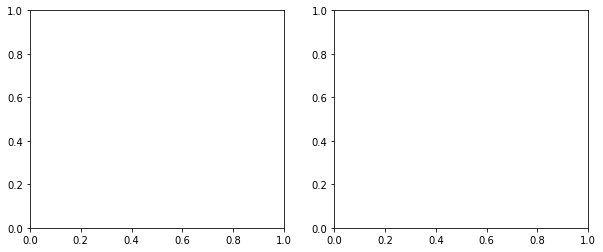

In [ ]:
fig = plt.figure(figsize = (10,4))

fig, axes = plt.subplots(1,2,figsize = (10,4))

# 2. Plotting with pandas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col = 'date', parse_dates =  True)
quakes = pd.read_csv('data/earthquakes.csv')
covid = pd.read_csv('data/covid19_cases.csv',).assign(
    date = lambda x : pd.to_datetime(x.dateRep,format = '%d/%m/%Y')
).set_index('date').replace('United_States_of_America','USA'
).sort_index()['2020-01-18':'2020-09-18']

- plot(  )메소드 내의 인자

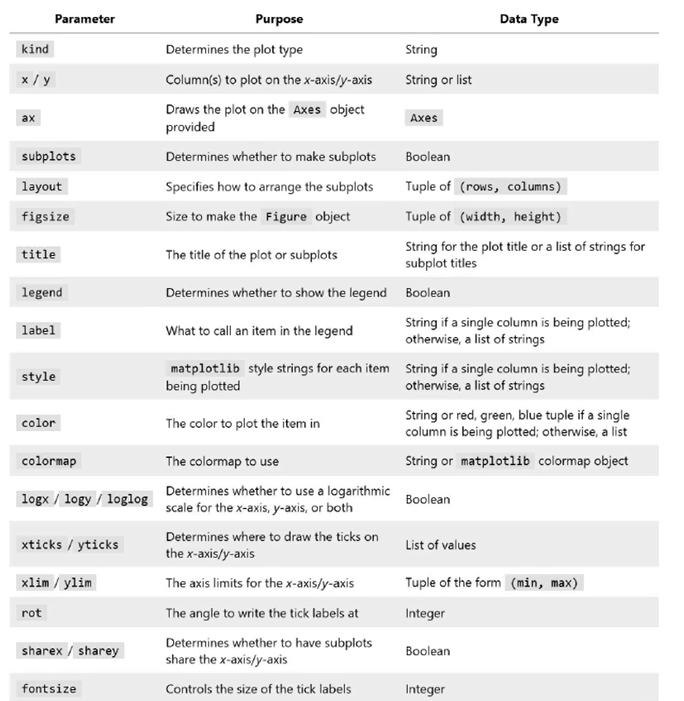

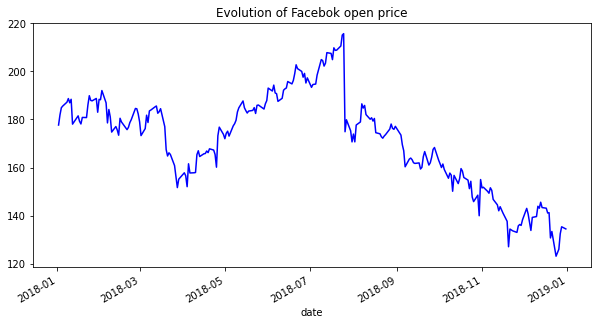

In [ ]:
fb.plot(
    kind = 'line', y = 'open', figsize = (10,5), color = 'blue',linestyle = 'solid',legend = False, title = 'Evolution of Facebok open price'
)

- We also apply different style to each columns individually

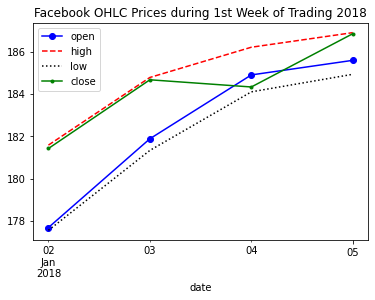

In [ ]:
fb.first('1W').plot(
    y = ['open','high','low','close'],
    style = ['o-b','--r',':k','.-g'],
    title = "Facebook OHLC Prices during 1st Week of Trading 2018"
).autoscale()  #좌표 축 범위 자동 조정

In [ ]:
new_cases_rolling_average = covid.pivot_table(
    index = covid.index,
    columns = 'countriesAndTerritories',
    values = 'cases'
).rolling(7).mean()

new_cases_rolling_average

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_Republic_of_Tanzania,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,45.428571,156.857143,270.000000,18.428571,57.142857,0.0,0.0,10667.857143,154.142857,85.285714,...,0.0,5.571429,18.428571,549.285714,1035.857143,2.000000,0.0,3.714286,109.000000,78.428571
2020-09-15,45.857143,159.142857,263.285714,25.285714,60.428571,0.0,0.0,10963.571429,160.571429,82.571429,...,0.0,4.428571,17.000000,583.571429,1031.285714,2.000000,0.0,3.142857,126.285714,33.285714
2020-09-16,47.857143,159.857143,256.571429,25.285714,65.428571,0.0,0.0,11062.571429,166.571429,80.428571,...,0.0,5.857143,16.428571,602.714286,1013.142857,1.285714,0.0,3.142857,123.857143,26.857143


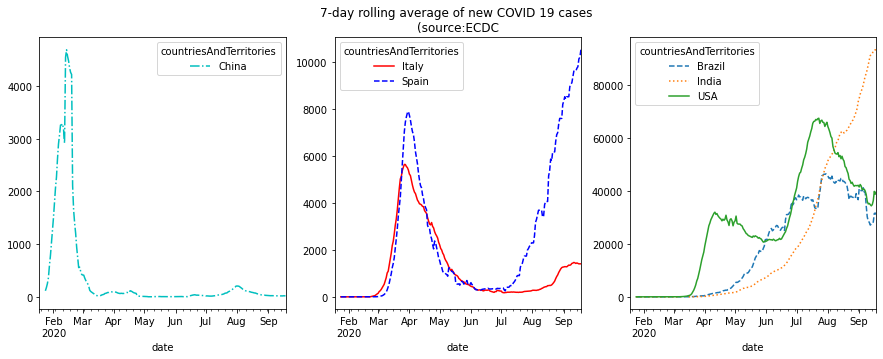

In [ ]:
fig,axes =  plt.subplots(1,3,figsize = (15,5))

new_cases_rolling_average[['China']].plot(ax = axes[0],style = '-.c')
new_cases_rolling_average[['Italy','Spain']].plot(ax = axes[1],style = [ '-r','--b'], title = '7-day rolling average of new COVID 19 cases \n(source:ECDC')
new_cases_rolling_average[['Brazil','India','USA']].plot(ax = axes[2],style = ['--',':','-'])

### Area Plot  
- At same time, how much each country is contributing to the total

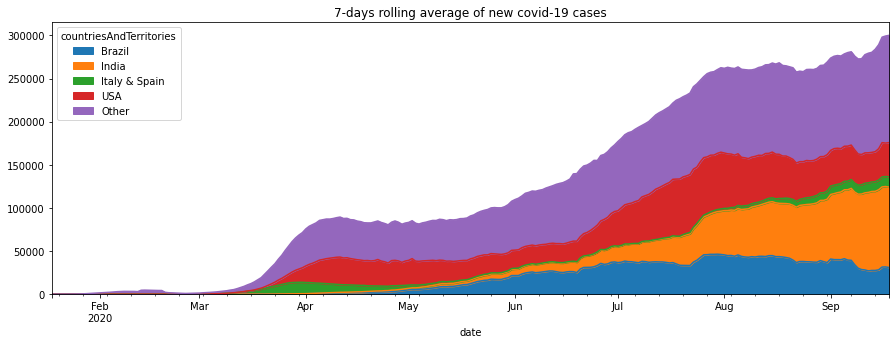

In [ ]:
cols = [
    col for col in new_cases_rolling_average.columns
    if col not in [
        'USA','Brazil','India','Italy & Spain'
    ]
]
new_cases_rolling_average.assign(
    **{'Italy & Spain' : lambda x : x.Italy + x.Spain}
).sort_index(axis = 1).assign(
    Other =  lambda x : x[cols].sum(axis = 1)
).drop(columns = cols).plot(
    kind = 'area',figsize = (15,5), title = '7-days rolling average of new covid-19 cases'
)

- Relationships between variables

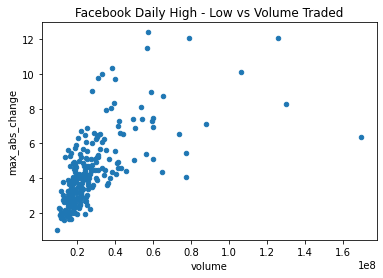

In [ ]:
fb.assign(max_abs_change = fb.high - fb.low).plot(
    kind = 'scatter', x = 'volume',y = 'max_abs_change',title = 'Facebook Daily High - Low vs Volume Traded'
)

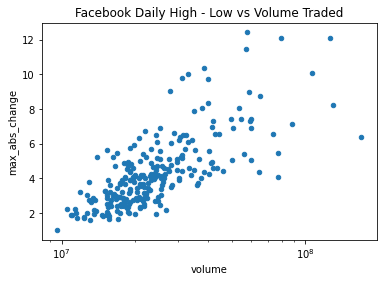

In [ ]:
# logx = True인자를 통해, x값을 로그화하여 표현가능 => np.log를 이용해 새로운 변수를 이용한 결과와 같음

fb.assign(max_abs_change = fb.high - fb.low).plot(
    kind = 'scatter', x = 'volume',y = 'max_abs_change',title = 'Facebook Daily High - Low vs log(Volume Traded)',
    logx = True
)

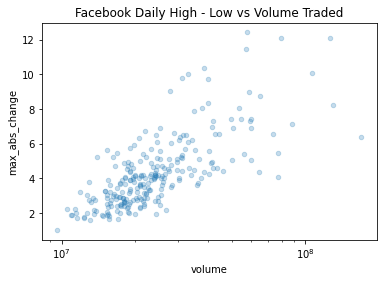

In [ ]:
#alpha를 이용하여 포화정도를 나타낼 수 있음

fb.assign(max_abs_change = fb.high - fb.low).plot(
    kind = 'scatter', x = 'volume',y = 'max_abs_change',title = 'Facebook Daily High - Low vs log(Volume Traded)',logx = True,
    alpha = 0.25
)

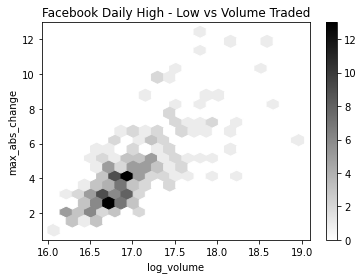

In [ ]:
#Hexbin을 이용하여 포화정도 파악가능

fb.assign(max_abs_change = fb.high - fb.low,log_volume = np.log(fb.volume)).plot(
    kind = 'hexbin', 
    x = 'log_volume',y = 'max_abs_change',title = 'Facebook Daily High - Low vs Volume Traded',
    colormap = 'gray_r',gridsize = 20, sharex = False
)


### Visualize Correlationship of variables

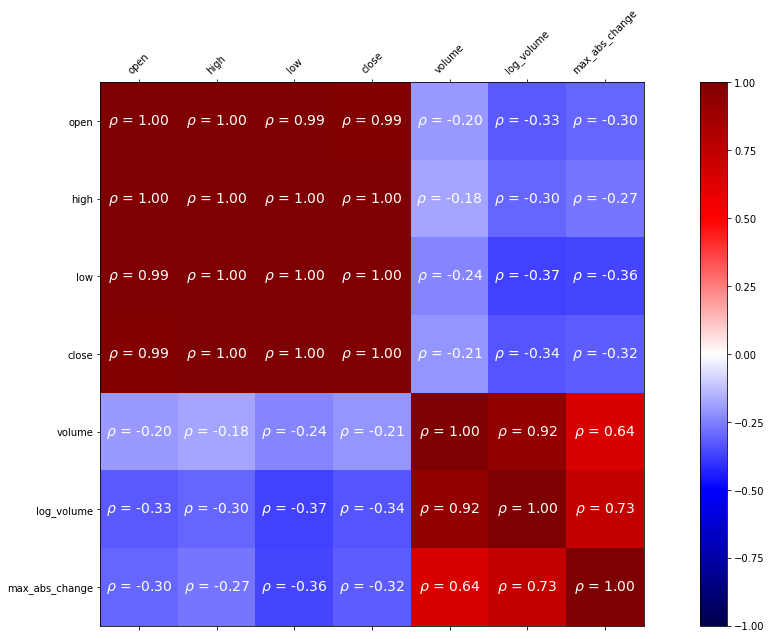

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

# calculate the correlation matrix
fb_corr = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr()

# create the heatmap and colorbar
im = ax.matshow(fb_corr, cmap='seismic')
im.set_clim(-1, 1)
fig.colorbar(im)

# label the ticks with the column names
labels = [col.lower() for col in fb_corr.columns]
ax.set_xticks(ax.get_xticks()[1:-1]) # to handle bug in matplotlib
ax.set_xticklabels(labels, rotation=45)
ax.set_yticks(ax.get_yticks()[1:-1]) # to handle bug in matplotlib
ax.set_yticklabels(labels)

# include the value of the correlation coefficient in the boxes
for (i, j), coef in np.ndenumerate(fb_corr):
    ax.text(
        i, j, fr'$\rho$ = {coef:.2f}', # raw (r), format (f) string
        ha='center', va='center', 
        color='white', fontsize=14
    )

### Visualize the distribution

- Histogram

Text(0.5, 0, 'Volume traded')

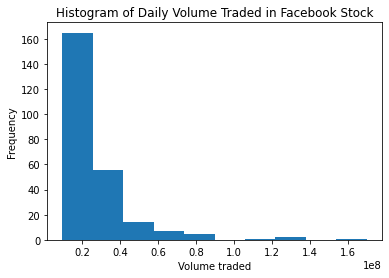

In [ ]:
fb.volume.plot(
    kind='hist', 
    title='Histogram of Daily Volume Traded in Facebook Stock'
)
plt.xlabel('Volume traded') # label the x-axis (discussed in chapter 6)

- 여러 히스토그램을 동일한 axes에 위치시켜, 여러 데이터의 분포를 비교할 수 있다.

Text(0.5, 0, 'magnitude')

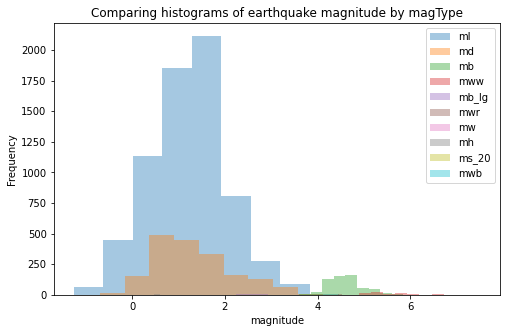

In [ ]:
fig, axes = plt.subplots(figsize=(8, 5))

for magtype in quakes.magType.unique():
    data = quakes.query(f'magType == "{magtype}"').mag
    if not data.empty:
        data.plot(
            kind='hist', ax=axes, alpha=0.4, 
            label=magtype, legend=True,
            title='Comparing histograms of earthquake magnitude by magType'
        )

plt.xlabel('magnitude') 

### Kernel Density Estimation (KDE ; 커널밀도추정)
We can pass `kind='kde'` for an estimate of the probability density function (PDF), which tells us the probability of getting a particular value:
-> 

Text(0.5, 0, 'Price ($)')

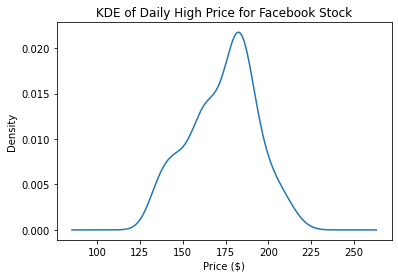

In [ ]:
fb.high.plot(
    kind='kde', 
    title='KDE of Daily High Price for Facebook Stock'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)

Text(0.5, 0, 'Price ($)')

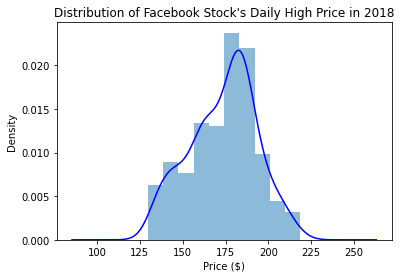

In [ ]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
    ax=ax, kind='kde', color='blue', 
    title='Distribution of Facebook Stock\'s Daily High Price in 2018'
)
plt.xlabel('Price ($)') # label the x-axis (discussed in chapter 6)

### Plotting the ECDF
In some cases, we are more interested in the probability of getting less than or equal to that value (or greater than or equal), which we can see with the **cumulative disribution function (CDF)**. Using the `statsmodels` package, we can estimate the CDF giving us the **empirical cumulative distribution function (ECDF)**:

Text(0.5, 1.0, 'ECDF of earthquake magnitude with magType ml')

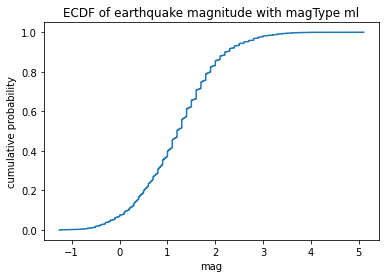

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

# axis labels (we will cover this in chapter 6)
plt.xlabel('mag') # add x-axis label 
plt.ylabel('cumulative probability') # add y-axis label

# add title (we will cover this in chapter 6)
plt.title('ECDF of earthquake magnitude with magType ml')

### Box plots
To make box plots with `pandas`, we pass `kind='box'` to the `plot()` method:

Text(0, 0.5, 'price ($)')

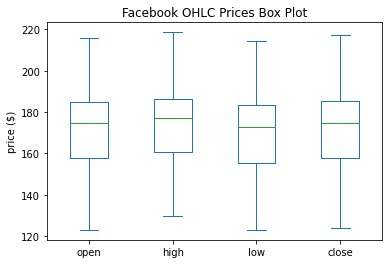

In [ ]:
fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Box Plot')
plt.ylabel('price ($)') # label the x-axis (discussed in chapter 6)

This can also be combined with a call to `groupby()`:

Text(0.5, 1.1, 'Facebook OHLC Box Plots by Volume Traded')

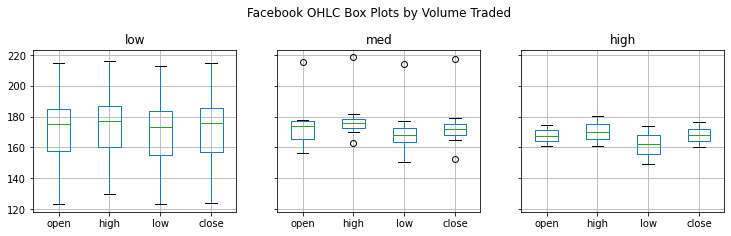

In [ ]:
fb.assign(
    volume_bin=pd.cut(fb.volume, 3, labels=['low', 'med', 'high'])
).groupby('volume_bin').boxplot(
    column=['open', 'high', 'low', 'close'],
    layout=(1, 3), figsize=(12, 3)
)
plt.suptitle('Facebook OHLC Box Plots by Volume Traded', y=1.1)

## Counts and frequencies
### Bar charts
Passing `kind='barh'` gives us horizontal bars while `kind='bar'` gives us vertical ones. Let's use horizontal bars to look at the top 15 places for earthquakes in our data:

Text(0.5, 0, 'earthquakes')

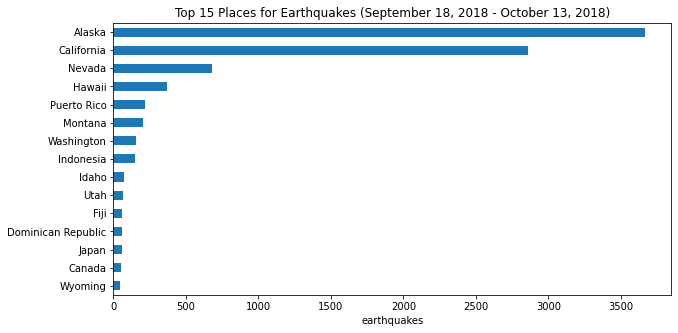

In [ ]:
quakes.parsed_place.value_counts().iloc[14::-1,].plot(
    kind='barh', figsize=(10, 5),
    title='Top 15 Places for Earthquakes '
          '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('earthquakes') # label the x-axis (discussed in chapter 6)

Text(0.5, 0, 'earthquakes')

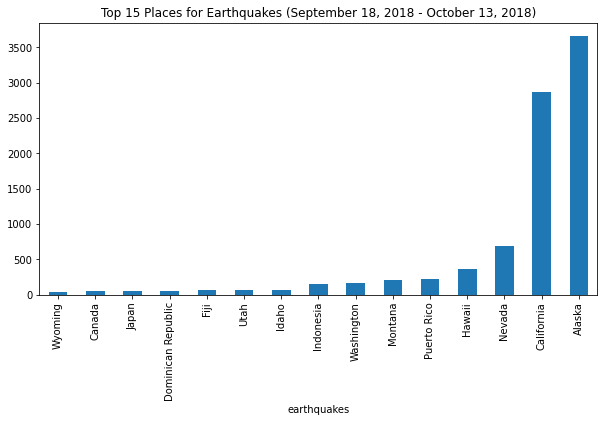

In [ ]:
quakes.parsed_place.value_counts().iloc[14::-1,].plot(
    kind='bar', figsize=(10, 5),
    title='Top 15 Places for Earthquakes '
          '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('earthquakes') # label the x-axis (discussed in chapter 6)

Text(0.5, 0, 'tsunamis')

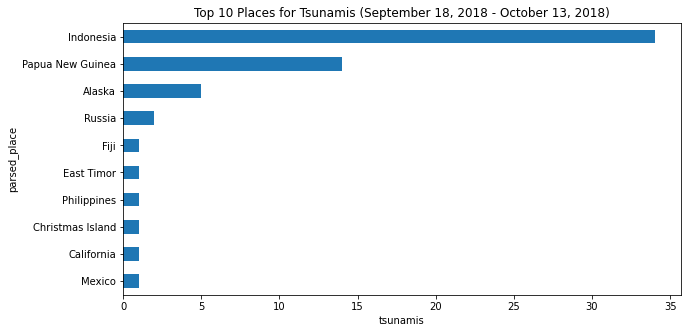

In [ ]:
quakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10:,].plot(
    kind='barh', figsize=(10, 5), 
    title='Top 10 Places for Tsunamis '
          '(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('tsunamis') # label the x-axis (discussed in chapter 6)

#### 

Text(0, 0.5, 'count')

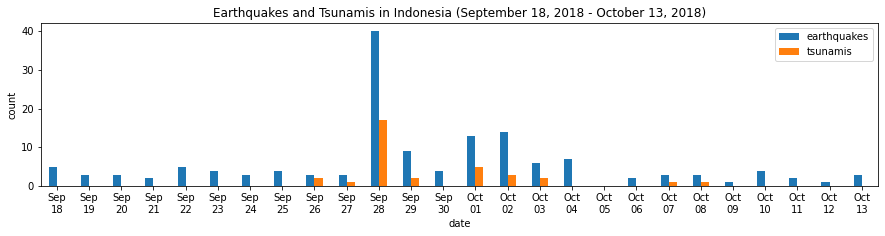

In [ ]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),    
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')  # 시간단위를 달\n일 로 설정

indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'],       #rot=0 : 축의 label을 0도(가로)로 설정
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)'
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

Text(0, 0.5, '')

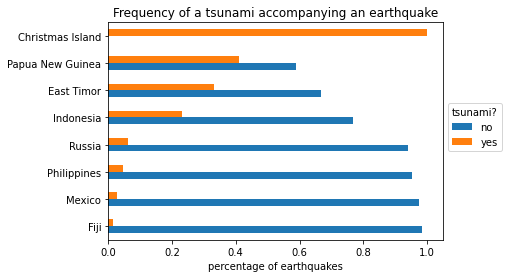

In [ ]:
quakes.groupby(['parsed_place', 'tsunami']).mag.count()\
    .unstack().apply(lambda x: x / x.sum(), axis=1)\      #axis  = 1 : 열 방향으로 비율를 구함 => 장소 별 no와 yes의 합계 = 1
    .rename(columns={0: 'no', 1: 'yes'})\
    .sort_values('yes', ascending=False)[7::-1]\
    .plot.barh(
        title='Frequency of a tsunami accompanying an earthquake'
    )

# move legend to the right of the plot
plt.legend(title='tsunami?', bbox_to_anchor=(1, 0.65))

# label the axes (discussed in chapter 6)
plt.xlabel('percentage of earthquakes')
plt.ylabel('')

- Which methods of measuring earthquake magnitude are most prevalent?

Text(0, 0.5, 'earthquakes')

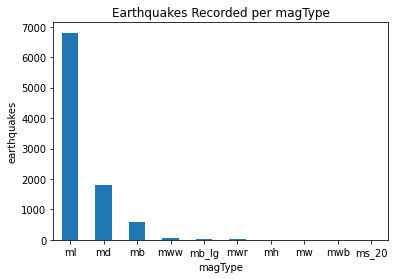

In [ ]:
 quakes.magType.value_counts().plot(
    kind='bar', title='Earthquakes Recorded per magType', rot=0
)

# label the axes (discussed in chapter 6)
plt.xlabel('magType')
plt.ylabel('earthquakes')


### Stacked bars

We want to see how many earthquakes of a given magnitude there were and to distinguish them by magType
- 1) Which magnitudes occur most often across magType.
- 2) The relative ranges of magnitude that each magType yields
- 3) The most common values for magType

In [ ]:
pivot = quakes.assign(
    mag_bin=lambda x: np.floor(x.mag) # 올림을 통한 정수화
).pivot_table(
    index='mag_bin', columns='magType', values='mag', aggfunc='count'
)
pivot

magType,mb,mb_lg,md,mh,ml,ms_20,mw,mwb,mwr,mww
mag_bin,,,,,,,,,,
-2.0,NaN,NaN,1.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN
-1.0,NaN,NaN,29.0,2.0,446.0,NaN,NaN,NaN,NaN,NaN
0.0,NaN,NaN,721.0,9.0,2072.0,NaN,NaN,NaN,NaN,NaN
1.0,NaN,NaN,700.0,1.0,3126.0,NaN,NaN,NaN,NaN,NaN
2.0,NaN,25.0,267.0,NaN,985.0,NaN,NaN,NaN,NaN,NaN
3.0,7.0,5.0,77.0,NaN,153.0,NaN,3.0,NaN,2.0,NaN
4.0,514.0,NaN,1.0,NaN,6.0,NaN,1.0,NaN,12.0,2.0
5.0,79.0,NaN,NaN,NaN,2.0,1.0,NaN,2.0,NaN,55.0
6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


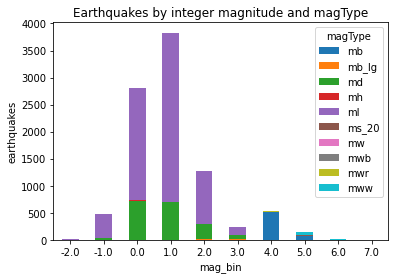

In [ ]:
pivot.plot(
    kind = 'bar',
    stacked=True, rot=0, ylabel='earthquakes', 
    title='Earthquakes by integer magnitude and magType'
)

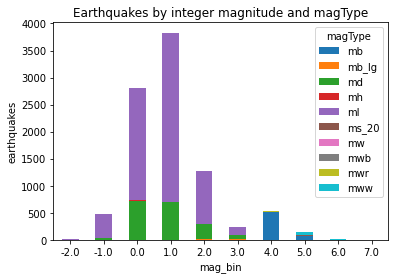

In [ ]:
 # kind가 아닌 plot 내 bar()을 이용하여 그래프 작성 가능
 pivot.plot.bar(
    stacked=True, rot=0, ylabel='earthquakes', 
    title='Earthquakes by integer magnitude and magType'
)

#### Normalized stacked bars
- NA값에 0을 넣은 후 비율을 세어,비율을 계산하기 더욱 좋음!  
Plot the percentages to be better able to see the different `magTypes`.

Text(0, 0.5, 'percentage')

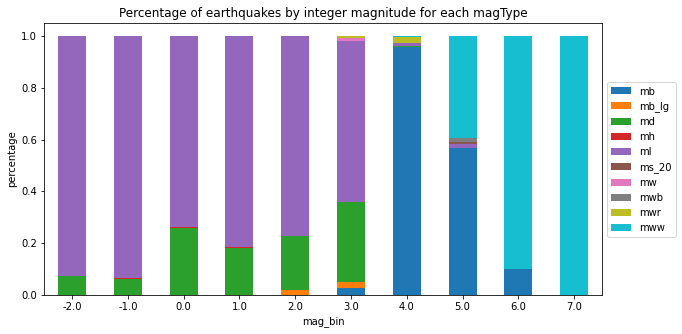

In [ ]:
normalized_pivot = pivot.fillna(0).apply(lambda x: x / x.sum(), axis=1)
ax = normalized_pivot.plot.bar(
    stacked=True, rot=0, figsize=(10, 5),
    title='Percentage of earthquakes by integer magnitude for each magType'
)
ax.legend(bbox_to_anchor=(1, 0.8)) # move legend to the right of the plot
plt.ylabel('percentage') # label the axes (discussed in chapter 6)

Text(0, 0.5, '')

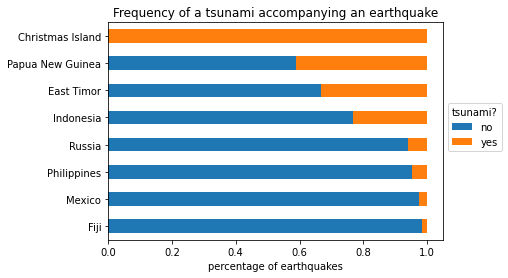

In [ ]:
quakes.groupby(['parsed_place', 'tsunami']).mag.count()\
    .unstack().apply(lambda x: x / x.sum(), axis=1)\
    .rename(columns={0: 'no', 1: 'yes'})\
    .sort_values('yes', ascending=False)[7::-1]\
    .plot.barh(
        title='Frequency of a tsunami accompanying an earthquake', 
        stacked=True
    )

# move legend to the right of the plot
plt.legend(title='tsunami?', bbox_to_anchor=(1, 0.65))

# label the axes (discussed in chapter 6)
plt.xlabel('percentage of earthquakes')
plt.ylabel('')